# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Требуется построить модель с предельно большим значение f1-меры.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Краткая информаци о данных и цели проекта:

Общие признаки:
* **RowNumber** — индекс строки в данных
* **CustomerId** — уникальный идентификатор клиента
* **Surname** — фамилия
* **CreditScore** — кредитный рейтинг
* **Geography** — страна проживания
* **Gender** — пол
* **Age** — возраст
* **Tenure** — сколько лет человек является клиентом банка
* **Balance** — баланс на счёте
* **NumOfProducts** — количество продуктов банка, используемых клиентом
* **HasCrCard** — наличие кредитной карты
* **IsActiveMember** — активность клиента
* **EstimatedSalary** — предполагаемая зарплата

Целевой признак:
* **Exited** — факт ухода клиента

Задача:
* **Отобрать модель с наибольшим показателем(f1 > 59.0) эффективности прогнозирования ухода клиента из банка**

## Просмотр  и подготовка данных

### Импорт

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

### **Предпросмотр**

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
display(data.head())
display(data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

In [4]:
data.duplicated().sum()

0

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Вывод:** Данные требуют небольшой предподготовки и более детального просмотра параметров перед работой с моделью.

### Заполнение пропусков

Информация о времени пользования услуг банка клиентом неполна и содержит пропуски в значимом объёме. Перед принятием решения о заполнении - изучим имеющиеся данные:

AxesSubplot(0.125,0.125;0.775x0.755)
count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


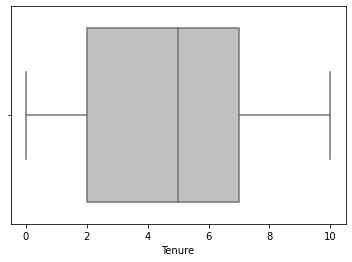

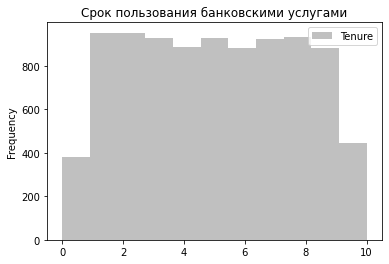

In [6]:
print(sns.boxplot(x = 'Tenure', data = data, color = 'silver'))
print(data['Tenure'].describe())
print(data.plot(kind = 'hist', y = 'Tenure', title = 'Срок пользования банковскими услугами', color = 'silver', bins = 11))

**Посмотрим, кореляцию времени использования услуг банка и оттока клиентов**

In [7]:
display(data.pivot_table( values = 'Tenure', columns = 'Exited', aggfunc = ['mean','median']))

mean           median     
Exited         0         1      0    1
Tenure  5.022247  4.901834    5.0  5.0

In [8]:
display(data.pivot_table(index = 'CustomerId', values = ['Tenure', 'Exited']).corr())

,Exited,Tenure
Exited,1.000000,-0.016761
Tenure,-0.016761,1.000000


**Полученная информация способствует спокойному заполнению пропусков вне зависимости от причастности клиента к расторжению договора с банком**

для минимизирования влияния заполнения пропуска на статистику - используем метод ffill

In [9]:
data['Tenure'].fillna(method = 'ffill', inplace = True)

Сравним старую и новые диаграммы:

AxesSubplot(0.125,0.125;0.775x0.755)
count    10000.000000
mean         4.992700
std          2.891588
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


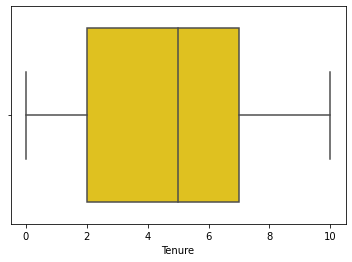

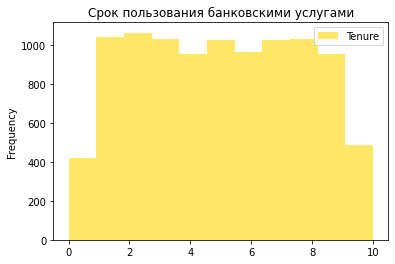

In [10]:
print(sns.boxplot(x = 'Tenure', data = data, color = 'gold'))
print(data['Tenure'].describe())
print(data.plot(kind = 'hist', y = 'Tenure', title = 'Срок пользования банковскими услугами', color = 'gold', alpha = 0.6, bins = 11))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**После заполнения пропусков продолжим исследование каждого столбца в отдельности**

### Проверка признаков

####   RowNumber

RowNumber - дополнительный индекс строки в данных. Необходимость данного столбца стремится к нулю, что приводит к решению о его удалении после дополнительной проверки на дубликаты. 

In [12]:
data['RowNumber'].duplicated().sum()

0

In [13]:
data['RowNumber'].value_counts().sum()

10000

Столбец RowNumber является лишь дубликатом индексов.

**Вывод:** - удаляем столбец

In [14]:
data = data.drop(columns = ['RowNumber'], axis = 1)

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB
None


#### CustomerId

CustomerId - уникальный идентификатор клиента.

    
В этом столбце нас так же интересует наличие одинаковых идентификаторов.

In [16]:
data['CustomerId'].value_counts().sum()

10000

In [17]:
data['CustomerId'].duplicated().sum()

0

Идентификатор клиента - его уникальный номер, который ни на что не влияет и аналогичен индексу. Для дальнейшей работы наличие таких данных будет неоправдано. 

**Вывод:** - удаляем столбец

In [18]:
data = data.drop(columns = ['CustomerId'], axis = 1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  float64
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 937.6+ KB
None


#### Surname 

Surname — фамилия клиента. Просмотр:

In [19]:
display(data['Surname'].head(10))

0    Hargrave
1        Hill
2        Onio
3        Boni
4    Mitchell
5         Chu
6    Bartlett
7      Obinna
8          He
9          H?
Name: Surname, dtype: object

In [20]:
data['Surname'].value_counts()

Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Greaves       1
Bermudez      1
Frankland     1
Samson        1
Forwood       1
Name: Surname, Length: 2932, dtype: int64

Антропонимика - достойна отдельных исследований, а в данном случае - информативность столбца околонулевая. 
По Surname нельзя определить является ли клиент родственником другому клиенту, и то, сгенерированы ли эти имена случайно
для защиты личных прав клиента.

**Вывод** - удаление столбца.

In [21]:
data = data.drop(columns = ['Surname'], axis = 1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB
None


#### **CreditScore**

CreditScore — кредитный рейтинг клиента. Изучим столбец:

In [22]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

<AxesSubplot:xlabel='CreditScore'>

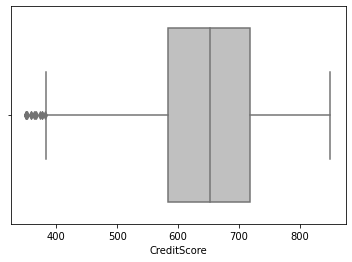

In [23]:
sns.boxplot(x = 'CreditScore', data = data, color = 'silver')

<AxesSubplot:title={'center':'Кредитный рейтинг'}, ylabel='Frequency'>

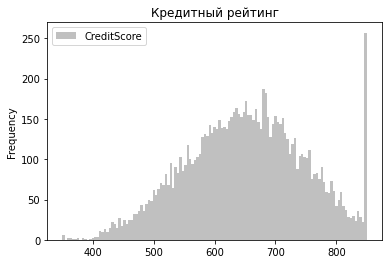

In [24]:
data.plot(kind = 'hist', y = 'CreditScore', title = 'Кредитный рейтинг', bins =125, color = 'silver')

Не удивительно, что количество людей с хорошим кредитным рейтингом выше, чем остальные. Диаграмма не выглядит аномально.

**Вывод** - столбец остается без изменений 

#### Geography 

Geography — страна проживания клиента.

In [25]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:>

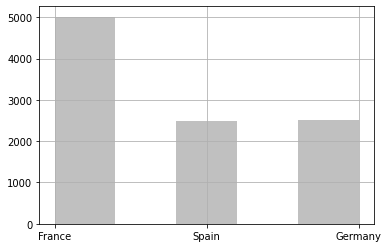

In [26]:
data['Geography'].hist(color = 'silver', bins = 5)

In [27]:
display(data.pivot_table( values = 'Exited', index = 'Geography', aggfunc = ['mean']))

,mean
,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


**Вывод:** 
* Большая часть клиентов банка находятся во Франции, в то же время самый большой отток прогнозируется в Германии -  в два раза больше, чем в двух других странах. 
* Данные по геолокации не содержат структурных ошибок. 
* Столбец остаётся без изменений.

#### Gender

Gender — пол клиента. 

In [28]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Male      5457
Female    4543
Name: Gender, dtype: int64


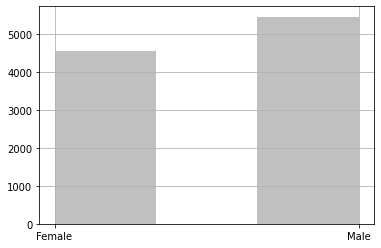

In [29]:
data['Gender'].hist(color = 'silver', bins = 3)
print(data['Gender'].value_counts())

In [30]:
display(data.pivot_table( values = 'Exited', index = 'Gender', aggfunc = ['mean']))

,mean
,Exited
Gender,
Female,0.250715
Male,0.164559


**Вывод** 
* Отток клиентов женского пола весомо больше мужского.
* Т.к. явных ошибок не обнаружени - оставим данные 'Gender' без изменений.

#### **Age**

Age — возраст клиента

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


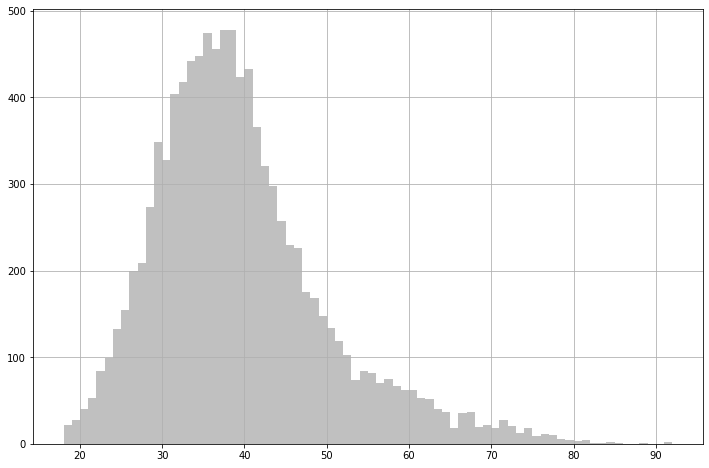

In [31]:
data['Age'].hist(bins = 74, color = 'silver', figsize = (12,8))
print(data['Age'].describe())

<AxesSubplot:ylabel='Age'>

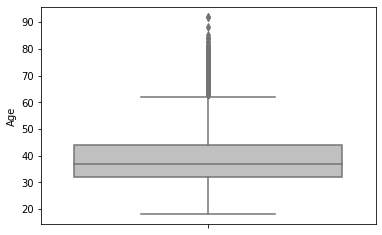

In [32]:
sns.boxplot(y = 'Age', data = data, color = 'silver')

In [33]:
data['Age'].dtypes

dtype('int64')

**Вывод** - аномальноых значений возраста нету, что оставляет столбец без изменений.

#### Tenure

Tenure — сколько лет человек является клиентом банка. 

count    10000.000000
mean         4.992700
std          2.891588
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

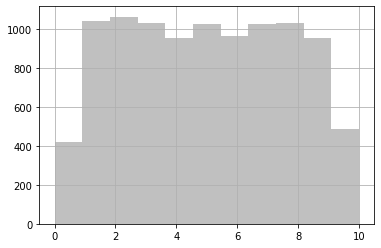

In [34]:
data['Tenure'].hist(bins = 11, color = 'silver')
data['Tenure'].describe()

In [35]:
data['Tenure'].value_counts()

2.0     1063
1.0     1039
8.0     1032
3.0     1029
5.0     1028
7.0     1028
6.0      963
4.0      955
9.0      955
10.0     489
0.0      419
Name: Tenure, dtype: int64

In [36]:
data['Tenure'].dtype

dtype('float64')

**Приведём данные к целочисленному виду, ввиду отсутствия дробных интервалов.**

In [37]:
data['Tenure'] = data['Tenure'].astype(int)
data['Tenure'].dtype

dtype('int64')

**Вывод** - Единственное, оправданное изменение - изменения типа данных.

#### Balance 

Balance — баланс на счёте клиента.

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


<AxesSubplot:>

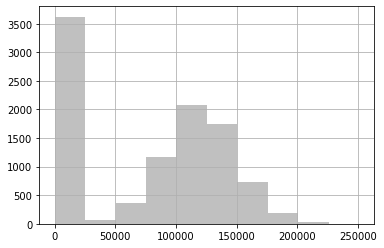

In [38]:
print(data['Balance'].describe())
data['Balance'].hist(color = 'silver')

<AxesSubplot:ylabel='Balance'>

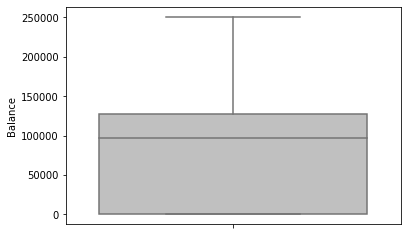

In [39]:
sns.boxplot(y = 'Balance', data = data, color = 'silver')

**Вывод** 
* Значительная часть клиентов банка имеет нулевой баланс.( Что в дальнейшем можно объяснить отсутствием у клиента банковской карты и, предположительно этого, счета)
* Эти данные не имеют видимых аномалий и остаются без изменений.

#### NumOfProducts 

NumOfProducts — количество продуктов банка, используемых клиентом

In [40]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64


<AxesSubplot:>

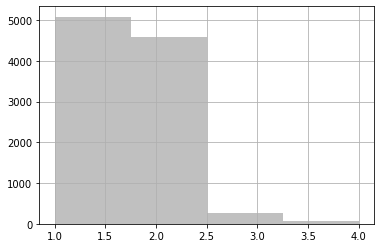

In [41]:
print(data['NumOfProducts'].describe())
data['NumOfProducts'].hist(color = 'silver', bins = 4)

<AxesSubplot:ylabel='NumOfProducts'>

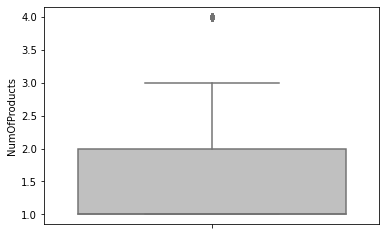

In [42]:
sns.boxplot(y = 'NumOfProducts', data = data, color = 'silver')

In [43]:
data['NumOfProducts'].dtype


dtype('int64')

**Вывод:** - Количество используемых продуктов банка клиентами не содержит видимых аномалий и остаётся без изменений.

#### HasCrCard 

HasCrCard — наличие кредитной карты банка у клиента

In [44]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [45]:
data['HasCrCard'].dtype

dtype('int64')

**Вывод** - Отсутствие видимых аномалий. Данные остаются без изменений.

####  IsActiveMember 

IsActiveMember — активность клиента

In [46]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [47]:
data['IsActiveMember'].dtype

dtype('int64')

**Вывод** - Нет точной информации, чем определено это значение. В нём нету четких аномалий и оно не требует изменения типа данных.

#### EstimatedSalary 

EstimatedSalary — предполагаемая зарплата клиента


In [48]:
data['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<AxesSubplot:>

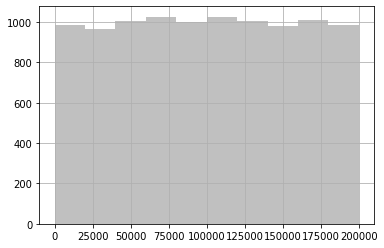

In [49]:
data['EstimatedSalary'].hist(color = 'silver')

<AxesSubplot:ylabel='EstimatedSalary'>

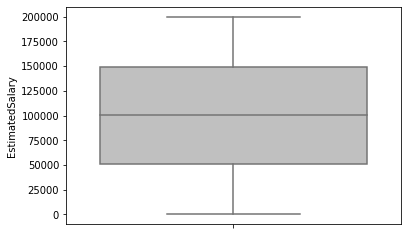

In [50]:
sns.boxplot(y = 'EstimatedSalary', data = data, color = 'silver')

странно смотрятся значения ожидаемой минимальной зарплаты около 11 единиц( предположительно $)

**Вывод** - мы не можем предсказать последовательность выводов которые привели к минимальному ожидаемому доходу, как не можем отрицать возможность такого исхода, притом, что общая совокупность выглядит нормально и не требует изменений.

#### **Exited | Целевой признак**


Exited — факт ухода клиента


In [51]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [52]:
data['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* **Целевой признак обозначен двумя значениями и харрактеризует дальнейшую работу как задачу бинарной классфикации.**

* **Дисбаланс признаков даёт нам представление о константной модели, которая применяясь к несбалансированным данным могла бы выдавать точность близкую к 80%**

## Исследование задачи

**Задача представляет из себя бинарную классификацию, под которую,в дальнейшим, будет подбираться модель**

### **Подготовка выборки**

Преобразование признаков:

### **Изменённое кодирование признаков**

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [55]:
target = data['Exited']
features = data.drop('Exited', axis = 1)

In [56]:
ohe_df = pd.DataFrame(ohe.fit_transform(features[['Gender','Geography']]))

In [57]:
features = features.drop(columns = ['Gender','Geography'])

In [58]:
features = features.join(ohe_df)

In [59]:
display(features.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1,2,3,4
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,1.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,1.0,0.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,1.0,0.0,0.0,0.0,1.0


Разделение признаков на разные data:

Разбиение выборки на **обучающую / валидационную / тестовую**

Выбрано соотношение 6:2:2, ввиду отсутствия скрытой тестовой выборки.

In [61]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.4, random_state = 12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size = 0.5, random_state = 12345)

In [62]:
print('Размеры выборок для обучения и тестов:', '\n')
print('Обучающая(признаки)', features_train.shape, 'Обучающая(целевой признак)', target_train.shape, '\n')
print('Валидационная(признаки)', features_valid.shape, 'Валидационная(целевой признак)', target_valid.shape, '\n')
print('Тестовая(признаки)', features_test.shape, 'Тестовая(целевой признак)', target_test.shape, '\n')


Размеры выборок для обучения и тестов: 

Обучающая(признаки) (6000, 13) Обучающая(целевой признак) (6000,) 

Валидационная(признаки) (2000, 13) Валидационная(целевой признак) (2000,) 

Тестовая(признаки) (2000, 13) Тестовая(целевой признак) (2000,) 



### Обучение моделей без внимания к дисбалансу классов 

**У каждой модели будем просмотривать f1 метрику, порог значения которой необходимо преодолеть**

#### DecisionTreeClassifier

In [63]:
best_model_dtc = None
best_result_dtc = 0


for depth in range(1, 12):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth ) 
    model.fit(features_train, target_train) 
    predicted = model.predict(features_valid) 
    result_f1 = f1_score(target_valid, predicted)
    if result_f1 > best_result_dtc:
        best_model_dtc = model
        best_result_dtc = result_f1
        
print(best_model_dtc,'\n','f1',best_result_dtc)



DecisionTreeClassifier(max_depth=9, random_state=12345) 
 f1 0.5857740585774057


In [64]:
%%time 

model = DecisionTreeClassifier(random_state = 12345, max_depth = 9)
model.fit(features_train, target_train)
predicted = model.predict(features_valid)
print('accuracy', accuracy_score(target_valid, predicted))
print('f1', f1_score(target_valid, predicted))

probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('auc_roc', roc_auc_score(target_valid, probabilities_one_valid))

accuracy 0.8515
f1 0.5857740585774057
auc_roc 0.7935551872440555
CPU times: user 38.4 ms, sys: 29 µs, total: 38.4 ms
Wall time: 38.4 ms


#### **RandomForestClassifier**

In [65]:
best_model_rfc = None
best_result_rfc = 0

for est in range(1,50,5):
    for depth in range(1,12):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        result_f1 = f1_score(target_valid, predicted)
        if result_f1 > best_result_rfc:
            best_model_rfc = model
            best_result_rfc = result_f1
        
print(best_model_rfc,'\n','f1', best_result_rfc)

RandomForestClassifier(max_depth=10, n_estimators=46, random_state=12345) 
 f1 0.5692068429237946


In [66]:
%%time

model = RandomForestClassifier(random_state = 12345, n_estimators = 46, max_depth = 10)
model.fit(features_train, target_train)
predicted = model.predict(features_valid)
print('score',  model.score(features_valid, target_valid))
print('f1', f1_score(target_valid, predicted))

probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('auc_roc', roc_auc_score(target_valid, probabilities_one_valid))

score 0.8615
f1 0.5692068429237946
auc_roc 0.845038985234607
CPU times: user 344 ms, sys: 0 ns, total: 344 ms
Wall time: 350 ms


Text(0.5, 1.0, 'ROC-кривая')

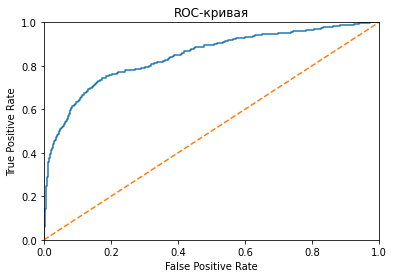

In [67]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

#### LogisticRegression 

In [105]:
%%time

model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_train, target_train)
predicted = model.predict(features_valid)
print('score', model.score(features_valid, target_valid))
print('f1', f1_score(target_valid, predicted))

probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('auc_roc', roc_auc_score(target_valid, probabilities_one_valid))

score 0.7815
f1 0.08385744234800838
[[0.83384596 0.16615404]
 [0.81417721 0.18582279]
 [0.83782872 0.16217128]
 ...
 [0.74219601 0.25780399]
 [0.7558032  0.2441968 ]
 [0.68205002 0.31794998]]
auc_roc 0.6729474531058137
CPU times: user 84.1 ms, sys: 79.5 ms, total: 164 ms
Wall time: 148 ms


#### CONST

In [69]:
target_pred_constant = pd.Series([0]* len(features_valid))
print('score', accuracy_score(target_valid, target_pred_constant))
print('f1', f1_score(target_valid, target_pred_constant))

score 0.791
f1 0.0


In [70]:
target_pred_constant = pd.Series([1]* len(features_valid))
print('score', accuracy_score(target_valid, target_pred_constant))
print('f1', f1_score(target_valid, target_pred_constant))

score 0.209
f1 0.3457402812241522


### **Вывод по первому исследованию задачи:**

* Лучше всех показала себя модель: DecisionTreeClassifier(random_state = 12345, max_depth = 9)
* Все модели показали недостаточность значений f1 меры.
* Для улучшения отношений точности и полноты, в дальнейших исследованиях, будет обработан дисбаланс классов:

## Борьба с дисбалансом

In [71]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

разница в 4 раза - множитель, который будем использовать

### **Upsampling**

Увеличим количество объектов редкого класса

In [72]:
def upsamp(features, target, count):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_up = pd.concat([features_zeros] + [features_ones] * count)
    target_up = pd.concat([target_zeros] + [target_ones] * count)
    features_up = shuffle(features_up, random_state = 12345)
    target_up = shuffle(target_up, random_state = 12345)
    return features_up, target_up 

In [73]:
features_up, target_up = upsamp(features_train, target_train, 4)

In [74]:
print(features_up.shape)
print(target_up.shape)

(9588, 13)
(9588,)


#### LogisticRegression UP

In [75]:
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_up, target_up)
predicted = model.predict(features_valid)

probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]

print('score', model.score(features_valid, target_valid))
print('f1', f1_score(target_valid, predicted))
print('auc_roc', roc_auc_score(target_valid, probabilities_one_valid))


score 0.6625
f1 0.45520581113801456
auc_roc 0.7216548007186108


#### **DecisionTreeClassifier UP**

In [76]:
best_model_dtc = None
best_f1_result_dtc = 0

for depth in range(1, 12):
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth ) 
    model.fit(features_up, target_up) 
    predicted = model.predict(features_valid) 
    result_f1 = f1_score(target_valid, predicted)
    if result_f1 > best_f1_result_dtc:
        best_model_dtc = model
        best_f1_result_dtc = result_f1
        
print(best_model_dtc)
print('f1',best_f1_result_dtc)

DecisionTreeClassifier(max_depth=5, random_state=12345)
f1 0.5963791267305644


In [77]:
%%time 

model = DecisionTreeClassifier(random_state = 12345, max_depth = 5)
model.fit(features_up, target_up)
predicted = model.predict(features_valid)
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]

print('accuracy', accuracy_score(target_valid, predicted))
print('f1', f1_score(target_valid, predicted))
print('auc_roc', roc_auc_score(target_valid, probabilities_one_valid))


accuracy 0.8105
f1 0.5963791267305644
auc_roc 0.8310244134068074
CPU times: user 35.1 ms, sys: 0 ns, total: 35.1 ms
Wall time: 38.7 ms


#### **RandomForestClassifier UP**

In [78]:
best_model_rfc = None
best_f1_result_rfc = 0



for est in range(1,50,5):
    for depth in range(1,12):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_up, target_up)
        predicted = model.predict(features_valid)
        result_f1 = f1_score(target_valid, predicted)
        if result_f1 > best_f1_result_rfc:
            best_model_dtc = model
            best_f1_result_rfc = result_f1
        
print(best_model_dtc,'\n','f1', best_f1_result_rfc)

RandomForestClassifier(max_depth=9, n_estimators=31, random_state=12345) 
 f1 0.625


In [79]:
%%time

model = RandomForestClassifier(random_state = 12345, n_estimators = 31, max_depth = 9)
model.fit(features_up, target_up)
predicted = model.predict(features_valid)

probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]

print('score',  model.score(features_valid, target_valid))
print('f1', f1_score(target_valid, predicted))
print('auc_roc', roc_auc_score(target_valid, probabilities_one_valid))


score 0.82
f1 0.625
auc_roc 0.8489359964674356
CPU times: user 376 ms, sys: 7.66 ms, total: 384 ms
Wall time: 431 ms


Text(0.5, 1.0, 'ROC-кривая')

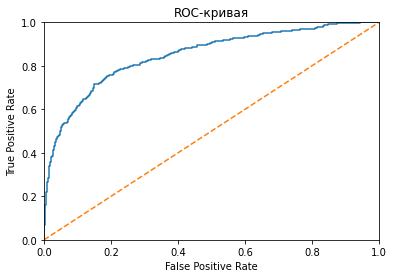

In [80]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

#### **Вывод по моделям upsampling**

Модели: 
* DecisionTreeClassifier(max_depth=5, random_state=12345)
* RandomForestClassifier(random_state = 12345, n_estimators = 31, max_depth = 9)


**прошли необходимый порог f1 меры.**

____________________________________________________________

**Для тестировки выбрана модель :**
* **RandomForestClassifier(random_state = 12345, n_estimators = 31, max_depth = 9)**

со значением f1 меры:
* **0.625**

### **Downsumpling**

In [81]:
def downsump(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_zeros_down = features_zeros.sample(frac = fraction, random_state = 12345)
    target_zeros_down = target_zeros.sample(frac = fraction, random_state = 12345)
    features_down = pd.concat([features_zeros_down] + [features_ones])
    target_down = pd.concat([target_zeros_down]+[target_ones])
    features_down = shuffle(features_down, random_state = 12345)
    target_down = shuffle(target_down, random_state = 12345)
    return features_down, target_down 

In [82]:
features_down, target_down = downsump(features_train, target_train, 0.25)

In [83]:
print(features_down.shape, target_down.shape)

(2397, 13) (2397,)


#### LogisticRegression DOWN

In [84]:
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_down, target_down)
predicted = model.predict(features_valid)
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]


print('score', model.score(features_valid, target_valid))
print('f1', f1_score(target_valid, predicted))
print('auc_roc', roc_auc_score(target_valid, probabilities_one_valid))

score 0.664
f1 0.45980707395498394
auc_roc 0.7290208626957578


#### DecisionTreeClassifier DOWN

In [85]:
best_model_dtc = None
best_f1_dtc = 0


for depth in range(1, 12):
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth ) 
    model.fit(features_down, target_down) 
    predicted = model.predict(features_valid) 
    result_f1 = f1_score(target_valid, predicted)
    if result_f1 > best_f1_dtc:
        best_model_dtc = model
        best_f1_dtc = result_f1
        
print(best_model_dtc,'\n','f1', best_f1_dtc)


DecisionTreeClassifier(max_depth=6, random_state=12345) 
 f1 0.5802816901408451


In [86]:
%%time 

model = DecisionTreeClassifier(random_state = 12345, max_depth = 5)
model.fit(features_down, target_down)
predicted = model.predict(features_valid)
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]


print('accuracy', accuracy_score(target_valid, predicted))
print('f1', f1_score(target_valid, predicted))
print('auc_roc', roc_auc_score(target_valid, probabilities_one_valid))

accuracy 0.7705
f1 0.5738161559888579
auc_roc 0.8195957512445636
CPU times: user 19.6 ms, sys: 136 µs, total: 19.7 ms
Wall time: 17.5 ms


#### **RandomForestClassifier DOWN**

In [87]:
best_model_rfc = None
best_f1_rfc = 0

for est in range(1,50,5):
    for depth in range(1,12):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_down, target_down)
        predicted = model.predict(features_valid)
        result_f1 = f1_score(target_valid, predicted)
        if result_f1 > best_f1_rfc:
            best_model_rfc = model
            best_f1_rfc = result_f1
        
print(best_model_rfc,'\n','f1',  best_f1_rfc)

RandomForestClassifier(max_depth=8, n_estimators=46, random_state=12345) 
 f1 0.6001899335232668


In [88]:
%%time

model = RandomForestClassifier(random_state = 12345, n_estimators = 46, max_depth = 8)
model.fit(features_down, target_down)
predicted = model.predict(features_valid)

probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]


print('score',  model.score(features_valid, target_valid))
print('f1', f1_score(target_valid, predicted))
print('auc_roc', roc_auc_score(target_valid, probabilities_one_valid))


score 0.7895
f1 0.6001899335232668
auc_roc 0.8428598648673171
CPU times: user 254 ms, sys: 138 µs, total: 254 ms
Wall time: 269 ms


Text(0.5, 1.0, 'ROC-кривая')

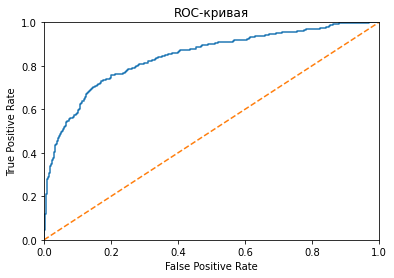

In [89]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

#### **Вывод по моделям downsumpling**

Модели:
* DecisionTreeClassifier(max_depth=5, random_state=12345) 
* RandomForestClassifier(random_state = 12345, n_estimators = 46, max_depth = 8) 


**прошли необходимый порог f1 меры**

_______________________________________________________________________

**Для тестировки выбрана модель:**
* **RandomForestClassifier(random_state = 12345, n_estimators = 46, max_depth = 8)**

со значением f1 меры:
* **0.6001899335232668**

## Тестирование модели

### Проверка отсортированной модели на тестовой выборке

#### **Объединение выборок**

In [90]:
features_list = [features_valid, features_train]
target_list = [target_valid, target_train]

all_features = pd.concat(features_list)
all_target = pd.concat(target_list)


#### Модель upsampling train = 6000

In [91]:
model = RandomForestClassifier(random_state = 12345, n_estimators = 31, max_depth = 9)

model.fit(features_up, target_up)

predicted = model.predict(features_test)

probabilities = model.predict_proba(features_test)
probabilities_one_test = probabilities[:,1]


print('score',  model.score(features_test, target_test))
print('f1', f1_score(target_test, predicted))
print('auc_roc', roc_auc_score(target_test, probabilities_one_test))

score 0.8115
f1 0.6052356020942409
auc_roc 0.8516664642894082


Text(0.5, 1.0, 'ROC-кривая')

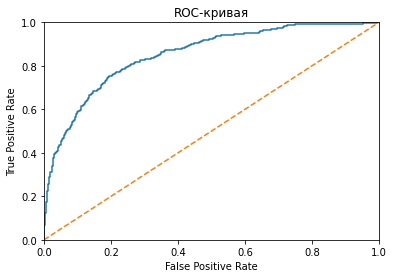

In [92]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

#### **Моддель Upsampling  train = 8000**

In [93]:
features_sum_up, target_sum_up = upsamp(all_features, all_target, 4)

In [94]:
print(features_sum_up.shape, target_sum_up.shape)

(12842, 13) (12842,)


In [95]:
model = RandomForestClassifier(random_state = 12345, n_estimators = 31, max_depth = 9)

model.fit(features_sum_up, target_sum_up)

predicted = model.predict(features_test)

probabilities = model.predict_proba(features_test)
probabilities_one_test = probabilities[:,1]


print('score',  model.score(features_test, target_test))
print('f1', f1_score(target_test, predicted))
print('auc_roc', roc_auc_score(target_test, probabilities_one_test))

score 0.8105
f1 0.608066184074457
auc_roc 0.8461790424107778


Text(0.5, 1.0, 'ROC-кривая')

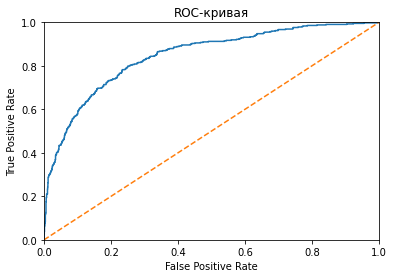

In [96]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

#### Модель downsampling train = 6000

In [97]:
%%time

model = RandomForestClassifier(random_state = 12345, n_estimators = 41, max_depth = 8)
model.fit(features_down, target_down)
predicted = model.predict(features_test)

probabilities = model.predict_proba(features_test)
probabilities_one_valid = probabilities[:,1]


print('score',  model.score(features_test, target_test))
print('f1', f1_score(target_test, predicted))
print('auc_roc', roc_auc_score(target_test, probabilities_one_valid))


score 0.778
f1 0.5865921787709497
auc_roc 0.8432340785313707
CPU times: user 216 ms, sys: 3.64 ms, total: 220 ms
Wall time: 227 ms


#### **Модель downsampling train = 8000**

In [98]:
features_sum_down, target_sum_down = downsump(all_features, all_target, 0.25)

In [99]:
print(features_sum_down.shape, target_sum_down.shape)

(3210, 13) (3210,)


In [100]:
%%time

model = RandomForestClassifier(random_state = 12345, n_estimators = 41, max_depth = 8)
model.fit(features_sum_down, target_sum_down)
predicted = model.predict(features_test)

probabilities = model.predict_proba(features_test)
probabilities_one_valid = probabilities[:,1]


print('score',  model.score(features_test, target_test))
print('f1', f1_score(target_test, predicted))
print('auc_roc', roc_auc_score(target_test, probabilities_one_valid))


score 0.7775
f1 0.58758109360519
auc_roc 0.8488616653999349
CPU times: user 213 ms, sys: 73 µs, total: 213 ms
Wall time: 211 ms


* **В сравнении с upsampling - модель не может преодолеть значение f1 меры и проигрывает по этому показателю**
* **Отвергаем эту модель**

### Сравнение с константной моделью

**Случайная**

In [101]:
x = [0,1]
predicted_tt = shuffle(x * int(len(target_test)/2), random_state = 12345)

print('f1_random',f1_score(target_test, predicted_tt))
print('score_random',accuracy_score(target_test, predicted_tt))

f1_random 0.3049894588896697
score_random 0.5055


**Монотонная**

In [102]:
target_pred_constant = pd.Series([0]* len(features_test))

print('score_const', accuracy_score(target_test, target_pred_constant))
print('f1_const', f1_score(target_test, target_pred_constant))

score_const 0.7885
f1_const 0.0


In [103]:
target_pred_constant = pd.Series([1]* len(features_test))
print('score', accuracy_score(target_test, target_pred_constant))
print('f1', f1_score(target_test, target_pred_constant))

score 0.2115
f1 0.3491539413949649


### Вывод:

1. Модель **upsampling** прошла необходимый порог f1 меры.
2. Статичные модели показали себя в разы хуже полученной.

* **=> Модель адекватна.**

## **Общий вывод:**

* Были незначительно предобработанны данные: заполнены пропуски и удалены значения негативно влияющие на построение моделями закономерностей.
* На установленной задаче бинарной классификации были рассмотрены модели **DecisionTreeClassifier ; RandomForestClassifier ; LogisticRegression.**
* Модели были рассмотрены на дисбалансе целевого признака и с урегулированием его объема.
* Наиболее эффективной оказалась модель **RandomForestClassifier** с гиперпараметрами **(random_state = 12345, n_estimators = 31, max_depth = 9)** 
* Обученная на upsampling выборке модель показала лучшую **f1 меру = 0.608066184074457 и прошла тест на адекватность.**
* Точность модели составила **81.05%**
